'data.zip' unzipped to 'extracted_data' successfully.
Files in 'extracted_data' directory:
dataset.csv
Loaded into a pandas DataFrame from 'extracted_data/dataset.csv'.


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


This data set has 4424 rows and 35 columns 
Checking for missing values....
Result: No Missing Values found.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's 

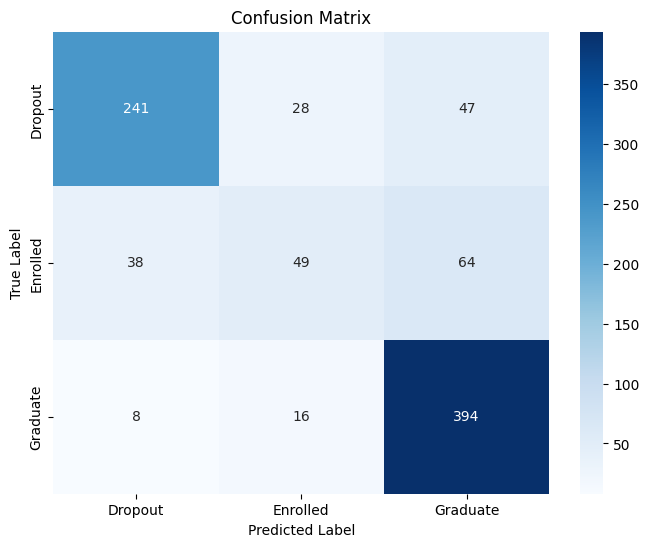

/tmp/ipython-input-871553193.py:173: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


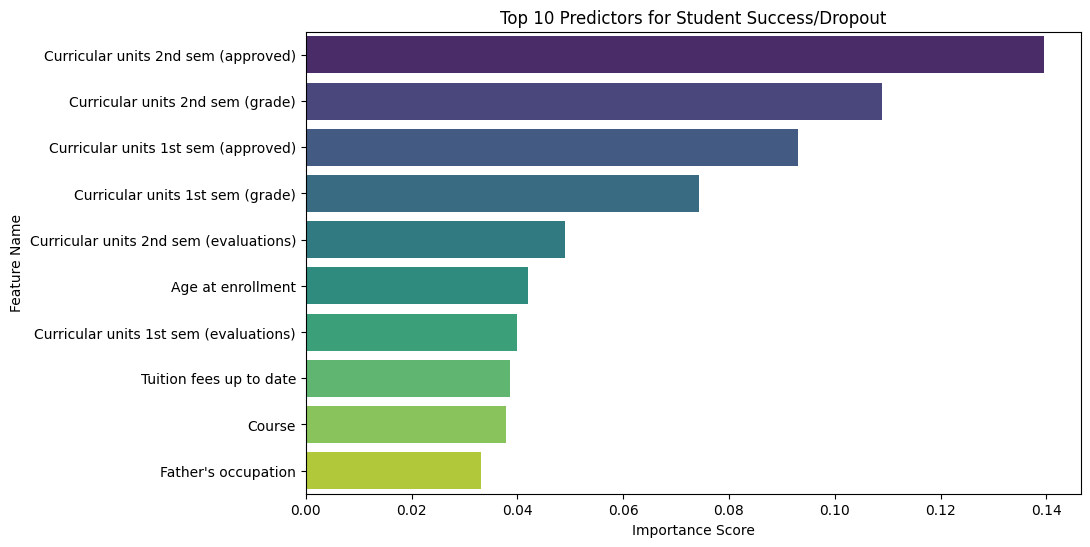

Model and columns saved successfully.
/bin/bash: line 1: --: No such file or directory
App file 'app.py' created successfully.
34.60.198.227
🎉 App is live at: https://didymous-clementina-governmentally.ngrok-free.dev



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.60.198.227:8501

  Stopping...
  Stopping...


In [25]:
# -*- coding: utf-8 -*-
"""Predict Students' Dropout and Academic Success.ipynb

"""

# ==========================================
# STEP 1: SETUP AND DATA LOADING
# ==========================================

import zipfile
import os
import pandas as pd
import time

# Unzipping the dataset
zip_file_path = 'data.zip'
extraction_path = 'extracted_data'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print(f"'{zip_file_path}' unzipped to '{extraction_path}' successfully.")

# Check extracted files
extracted_files = os.listdir('extracted_data')
print("Files in 'extracted_data' directory:")
for file_name in extracted_files:
    print(file_name)

# Loading Data
dataset_file = os.path.join(extraction_path, extracted_files[0])
df = pd.read_csv(dataset_file)
print(f"Loaded into a pandas DataFrame from '{dataset_file}'.")
display(df.head())

# ==========================================
# STEP 2: EXPLORATORY DATA ANALYSIS (EDA)
# ==========================================

# 1. Data Dimensions
print(f'This data set has {df.shape[0]} rows and {df.shape[1]} columns ')

# 2. Check for Missing Values
nulls_count = df.isnull().sum()
print("Checking for missing values....")
time.sleep(1)

if nulls_count.all() == 0:
  print("Result: No Missing Values found.")
else:
  print("Warning: Missing values detected. Consider handling them (imputation or removal).")

# 3. Data Types Overview
df.info()

# ==========================================
# STEP 3: PREPROCESSING & TARGET ENCODING
# ==========================================

"""
Target Strategy: Multiclass Prediction
We are predicting three outcomes: Graduate, Dropout, and Enrolled.
This provides a realistic view, distinguishing between students who have left
and those who are struggling but still active.
"""

# Category Mapping: From text category to Integer
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])

# Output the mapping for reference (e.g., 0=Dropout, 1=Enrolled, 2=Graduate)
print("Target Category Mapping:", le.classes_)

# ==========================================
# STEP 4: CORRELATION ANALYSIS
# ==========================================

"""
Analyzing correlations to identify Key Performance Indicators (KPIs).
Positive values indicate a link to Graduation.
Negative values indicate a link to Dropout.
"""

# Calculate correlation matrix
corr_matrix = df.corr()

# Isolate correlation with the Target variable
correlation_target = corr_matrix['Target'].sort_values(ascending=False)
print("\n--- Correlation with Target Variable ---")
print(correlation_target)

# Define Features (X) and Target (y)
X = df.drop('Target', axis=1)
y = df['Target']

# ==========================================
# STEP 5: MODEL TRAINING
# ==========================================

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split data: 80% Training, 20% Testing
# random_state=42 ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining Set dimensions: {X_train.shape}")
print(f"Test Set dimensions: {X_test.shape}")

# Initialize Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
print("\nTraining the model... please wait.")
model.fit(X_train, y_train)
print("Training completed.")

# ==========================================
# STEP 6: EVALUATION
# ==========================================

# Make predictions on the test set
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Detailed Classification Report
# Focus on 'Recall' for the Dropout class (Class 0) to see how many at-risk students we catch.
print("\n--- Classification Report ---")
print(classification_report(y_test, predictions))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dropout', 'Enrolled', 'Graduate'],
            yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ==========================================
# STEP 7: FEATURE IMPORTANCE
# ==========================================

# Extract feature importance from the model
importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Top 10 Features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Predictors for Student Success/Dropout')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.show()

# ==========================================
# STEP 8: DEPLOYMENT PREPARATION
# ==========================================

import joblib

# Save the model and column names for the app
joblib.dump(model, 'student_risk_model.pkl')
joblib.dump(X_train.columns, 'model_columns.pkl')

print("Model and columns saved successfully.")

# Install Streamlit
!pip install -q streamlit  <-- Uncomment if running in Colab

# ==========================================
# STEP 9: STREAMLIT WEB APP
# ==========================================


code = """
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load Model and Columns
model = joblib.load('student_risk_model.pkl')
model_columns = joblib.load('model_columns.pkl')

# Page Configuration
st.set_page_config(page_title="Student Risk Detector", page_icon="🎓")

# Title and Description
st.title('🎓 Student Risk Detection System')
st.write('Enter student details below to predict their academic outcome.')

# Sidebar for Inputs
st.sidebar.header('Student Profile')

# Input 1: Tuition Fees
tuition = st.sidebar.selectbox('Are tuition fees up to date?',
                               options=[1, 0],
                               format_func=lambda x: 'Yes (Paid)' if x == 1 else 'No (Overdue)')

# Input 2: Debtor Status
debtor = st.sidebar.selectbox('Is the student a debtor?',
                              options=[1, 0],
                              format_func=lambda x: 'Yes (Has Debt)' if x == 1 else 'No (Debt Free)')

# Input 3: Approved Units (2nd Semester)
approved_units = st.sidebar.slider('Units Approved (2nd Sem)', 0, 20, 5)

# Input 4: Grade Average (2nd Semester)
grade = st.sidebar.slider('Grade Average (2nd Sem)', 0.0, 20.0, 10.0)

# Prepare Data for Prediction
# Create a dataframe with zeros for all columns the model expects
input_data = pd.DataFrame(0, index=[0], columns=model_columns)

# Fill in the user inputs
input_data['Tuition fees up to date'] = tuition
input_data['Debtor'] = debtor
input_data['Curricular units 2nd sem (approved)'] = approved_units
input_data['Curricular units 2nd sem (grade)'] = grade
# Note: Other features are kept at 0 or default for this demo.

# Predict Button
if st.button('🔍 Predict Outcome'):
    prediction = model.predict(input_data)[0]
    proba = model.predict_proba(input_data)[0]

    st.write('---')
    st.subheader('Prediction Results:')

    # Logic for displaying results (0=Dropout, 1=Enrolled, 2=Graduate)
    if prediction == 0:
        st.error(f'🚨 Prediction: DROPOUT (High Risk)')
        st.write(f'Probability of Dropout: {proba[0]*100:.1f}%')
        st.info("Recommendation: Immediate intervention required. Financial counseling suggested.")

    elif prediction == 1:
        st.warning(f'⚠️ Prediction: ENROLLED (At Risk/Struggling)')
        st.write(f'Probability of staying Enrolled: {proba[1]*100:.1f}%')
        st.info("Recommendation: Academic tutoring support suggested.")

    else:
        st.success(f'✅ Prediction: GRADUATE (On Track)')
        st.write(f'Probability of Graduation: {proba[2]*100:.1f}%')
"""

with open("app.py", "w") as f:
    f.write(code)

print("App file 'app.py' created successfully.")


# ==========================================
# IMPORTANT: NGROK SETUP INSTRUCTIONS
# ==========================================
# To run this app from Google Colab, you need a free ngrok account:
# 1. Go to https://dashboard.ngrok.com/signup and sign up/login.
# 2. Navigate to "Your Authtoken" on the left sidebar.
# 3. Copy your Authtoken key.
# 4. Uncomment the code below and replace "YOUR_TOKEN_HERE" with your actual key.
# ==========================================



# ==========================================
# STEP 10: LAUNCH APP
# ==========================================

# Getting the IP for LocalTunnel (if used)
!wget -q -O - ipv4.icanhazip.com

# Installing ngrok
!pip install -q pyngrok

# Authenticating ngrok (REPLACE WITH YOUR TOKEN)
from pyngrok import ngrok
ngrok.set_auth_token("YOUR_TOKEN_HERE")

# Connecting
public_url = ngrok.connect(8501).public_url
print(f"🎉 App is live at: {public_url}")

# Running Streamlit
!streamlit run app.py